<a href="https://colab.research.google.com/github/MarinaIMadh/Computer_Vision/blob/main/M1_exercise_solution/ex1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Load the built-in image 'coffee' of the skimage libraries.

<ipython-input-10-fc9754992947>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(coffee_image) # visualize image using imshow function
<ipython-input-10-fc9754992947>:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


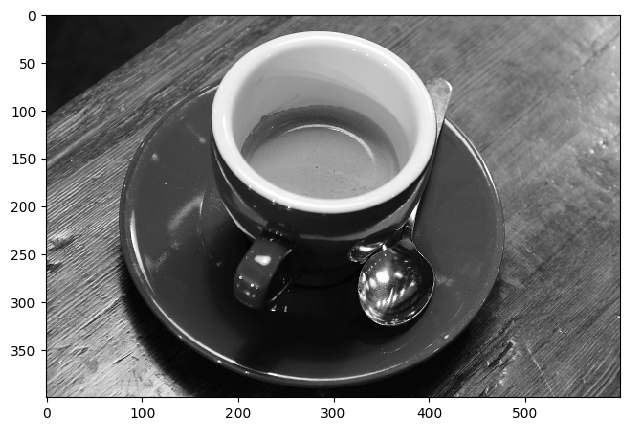

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, io, color

image = data.coffee()

coffee_image = color.rgb2gray(image)

io.imshow(coffee_image) # visualize image using imshow function
io.show()

# Display the image
# plt.figure(figsize=(4, 2))
# plt.imshow(coffee_image)
# plt.show()

 Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

    ‘gaussian’ Gaussian-distributed additive noise.
    ‘localvar’ Gaussian-distributed additive noise, with specified local variance at each point of image.
    ‘poisson’ Poisson-distributed noise generated from the data.
    ‘salt’ Replaces random pixels with 1.
    ‘pepper’ Replaces random pixels with 0 (for unsigned images) or -1 (for signed images).
    ‘s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.
    ‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.


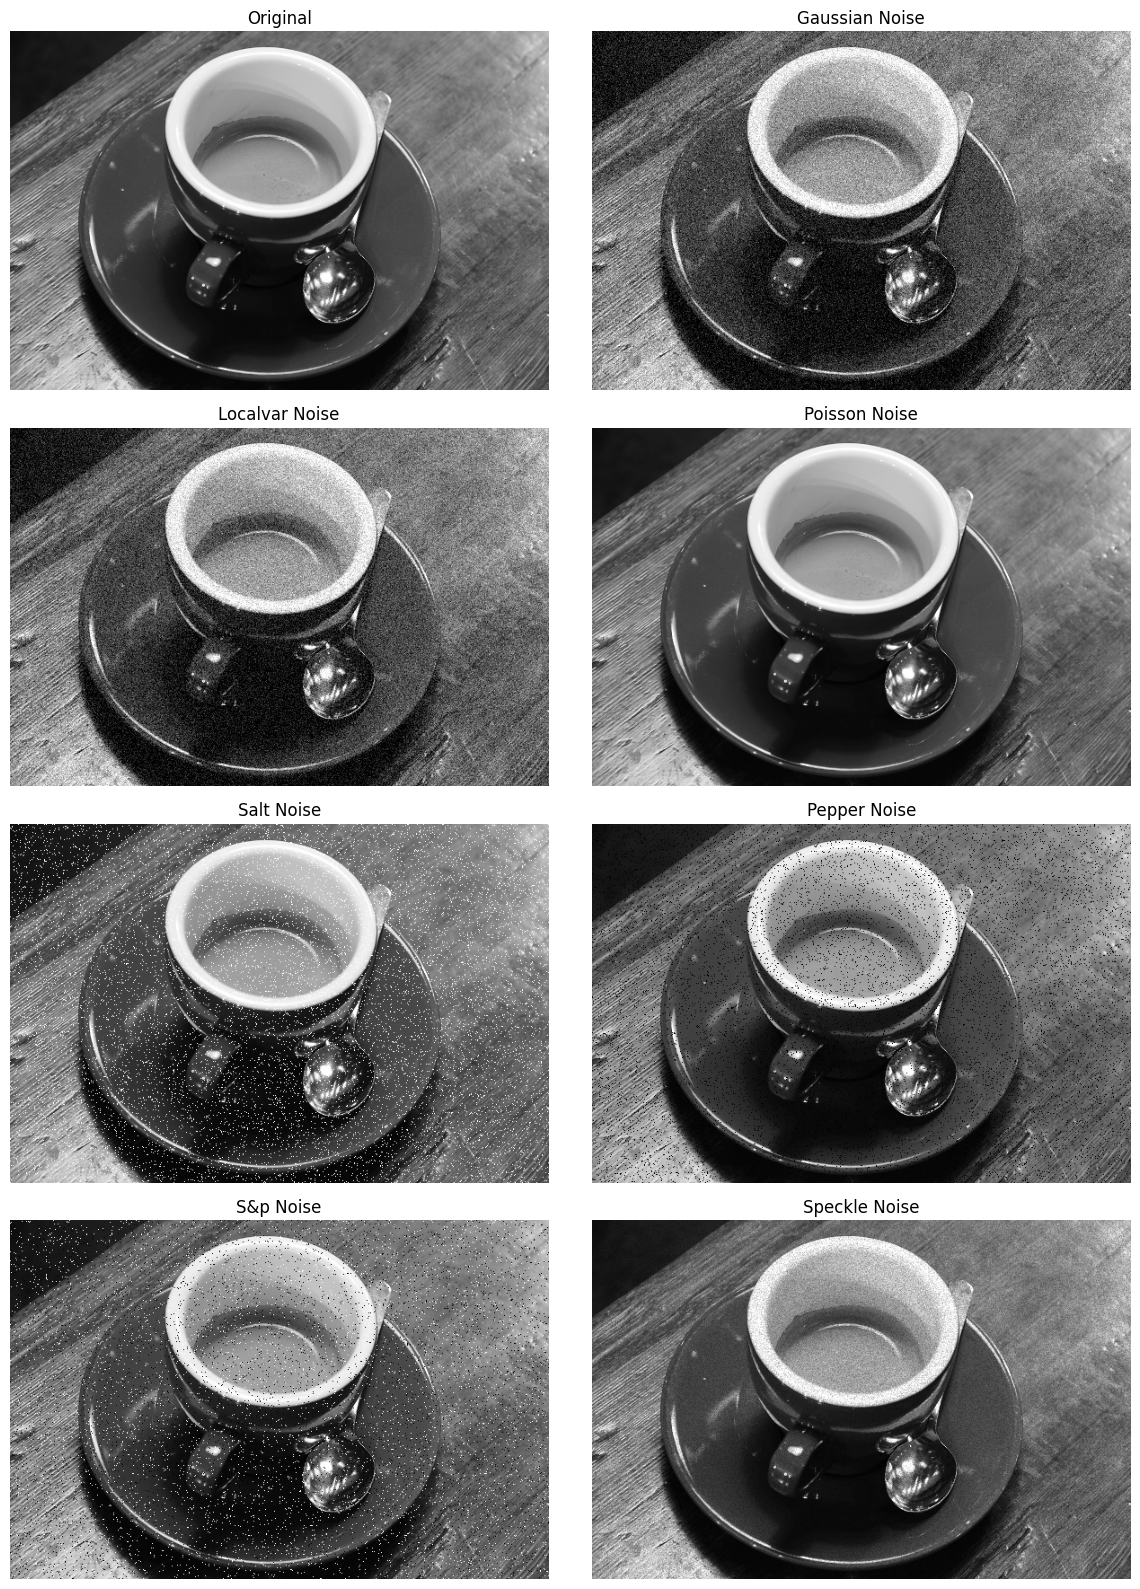

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, img_as_ubyte

# List of all supported noise types
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']

fig, axes = plt.subplots(4, 2, figsize=(12,16))
axes = axes.ravel()

# Show original image in the first subplot
axes[0].imshow(coffee_image, cmap="gray")
axes[0].set_title("Original")
axes[0].axis('off')

# Loop through each noise type
for i, noise_type in enumerate(noise_types, start=1):

    # Add noise
    if noise_type == 'localvar':
        local_variance = np.full(coffee_image.shape, 0.01)
        noisy = util.random_noise(coffee_image, mode=noise_type, local_vars=local_variance)
    else:
        noisy = util.random_noise(coffee_image, mode=noise_type)

    # Display the noisy image
    axes[i].imshow(noisy, cmap="gray")
    axes[i].set_title(noise_type.capitalize() + " Noise")
    axes[i].axis('off')

# Hide any unused subplots (in this case, none)
for j in range(len(noise_types) + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

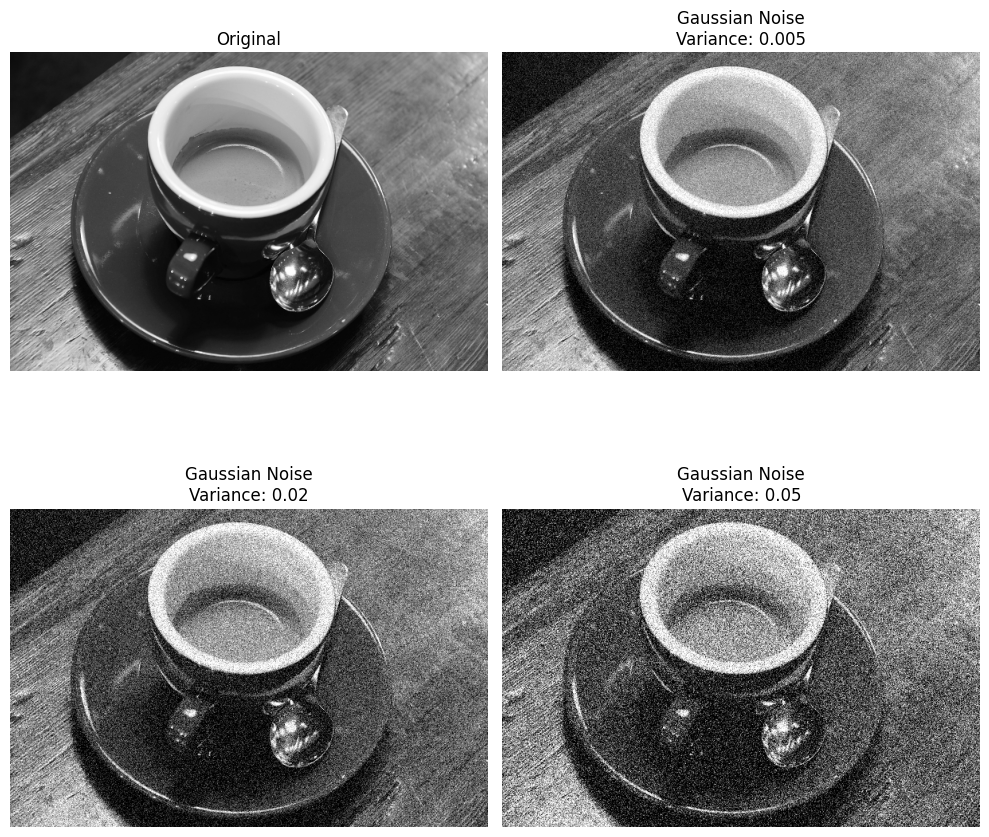

In [ ]:
from skimage import data, util, img_as_float

# Load the original image
coffee_rgb = data.coffee()
coffee_gray = color.rgb2gray(img_as_float(coffee_rgb))

# Define noise variances for low, medium, and high noise
variances = [0.005, 0.02, 0.05]
noisy_images = [util.random_noise(coffee_gray, mode='gaussian', var=v) for v in variances]

# Plotting the original and noisy images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

# Display original
axes[0].imshow(coffee_image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Display noisy images
for i, (img, var) in enumerate(zip(noisy_images, variances), start=1):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Gaussian Noise\nVariance: {var}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Task 4: **The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

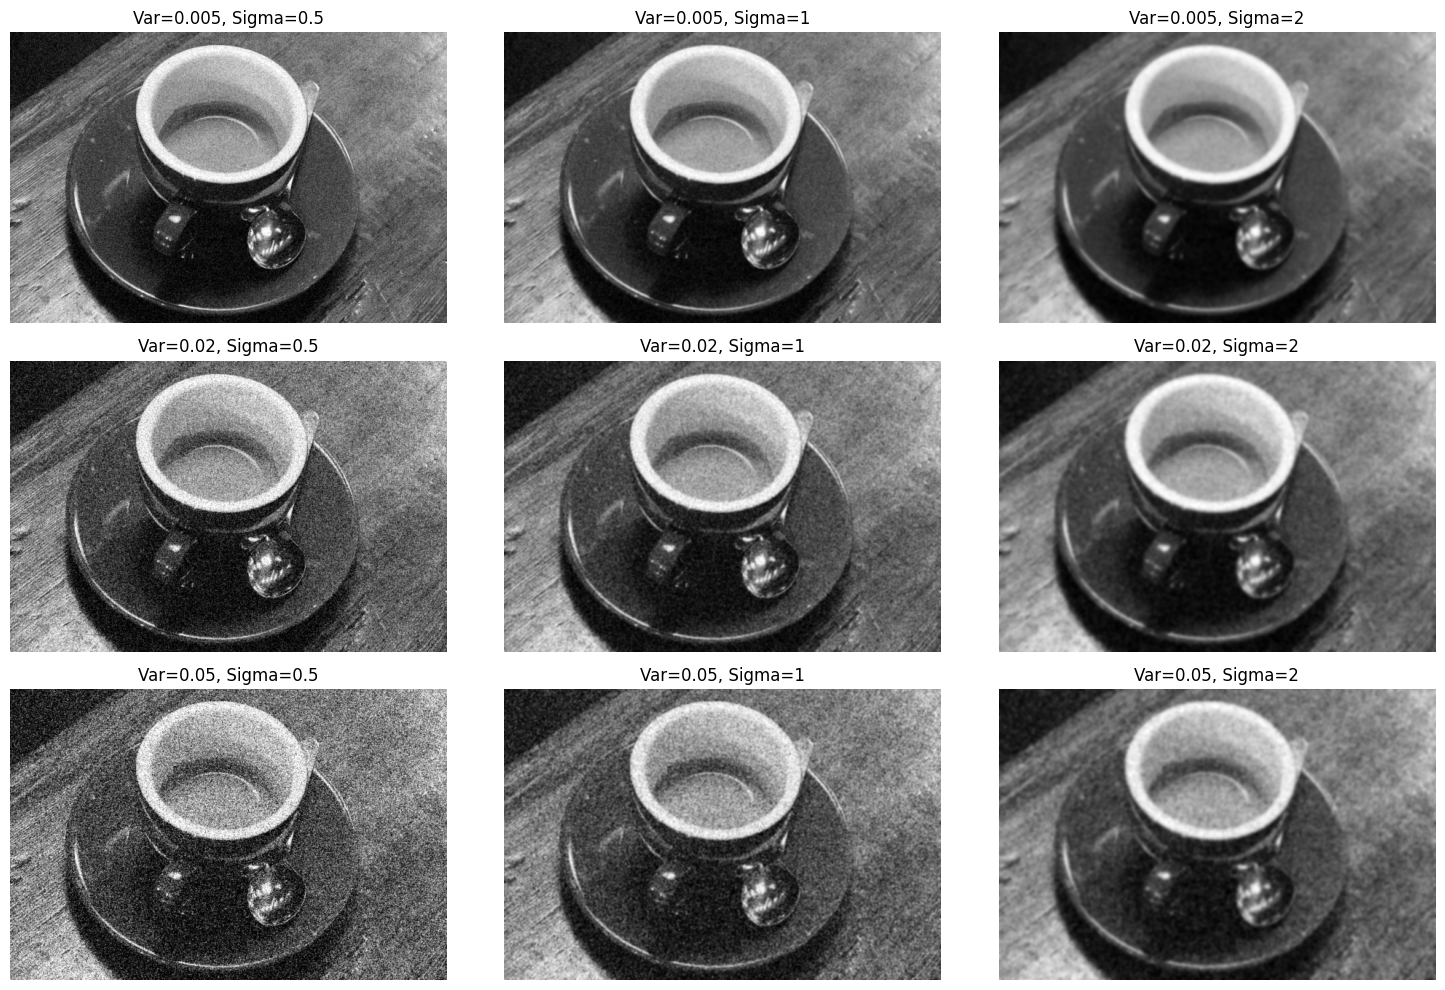

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, color, filters, img_as_float

# Load and prepare grayscale image
coffee_rgb = data.coffee()
coffee_gray = color.rgb2gray(img_as_float(coffee_rgb))

# Generate 3 noisy images with increasing Gaussian noise
variances = [0.005, 0.02, 0.05]
noisy_images = [util.random_noise(coffee_gray, mode='gaussian', var=v) for v in variances]

# Sigma values to test
sigmas = [0.5, 1, 2]

# Plotting: rows = variances, columns = different sigma values
fig, axes = plt.subplots(len(variances), len(sigmas), figsize=(15, 10))

for i, noisy in enumerate(noisy_images):
    for j, sigma in enumerate(sigmas):
        denoised = filters.gaussian(noisy, sigma=sigma)
        axes[i, j].imshow(denoised, cmap='gray')
        axes[i, j].set_title(f"Var={variances[i]}, Sigma={sigma}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

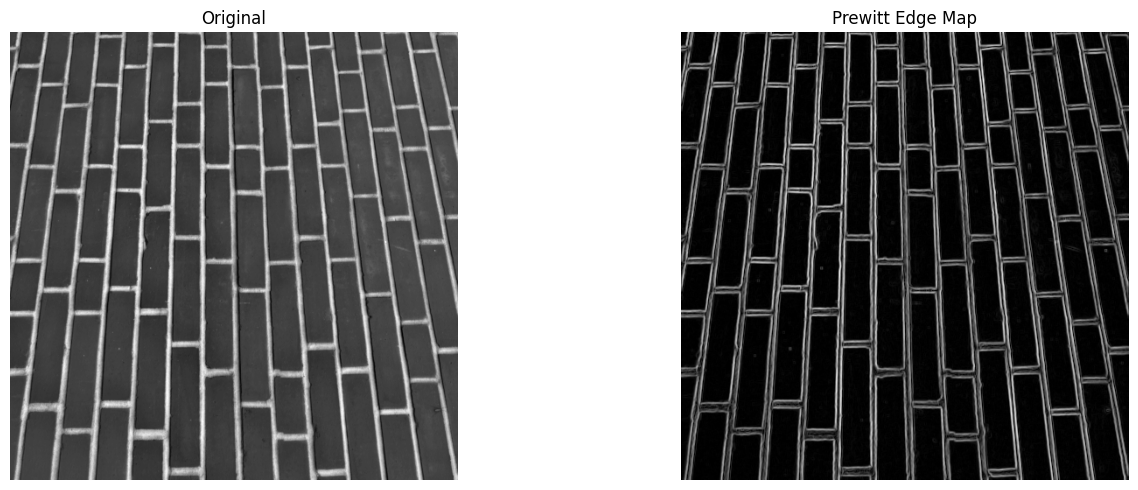

Fraction of image as edges: 0.1504
Fraction of image as bricks (non-edges): 0.8496


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Load the 'brick' image
bricks= data.brick()

# Apply Prewitt edge detection
edges_prewitt = filters.prewitt(bricks)

# Threshold the edge map to get binary edges
threshold = 0.1
edges_binary = edges_prewitt > threshold

# Compute fractions
total_pixels = bricks.size
edge_pixels = np.sum(edges_binary)
brick_pixels = total_pixels - edge_pixels

edge_fraction = edge_pixels / total_pixels
brick_fraction = brick_pixels / total_pixels

# Plot original, edge map, and binary edges
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(bricks, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(edges_prewitt, cmap='gray')
axes[1].set_title("Prewitt Edge Map")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Print results
print(f"Fraction of image as edges: {edge_fraction:.4f}")
print(f"Fraction of image as bricks (non-edges): {brick_fraction:.4f}")


Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

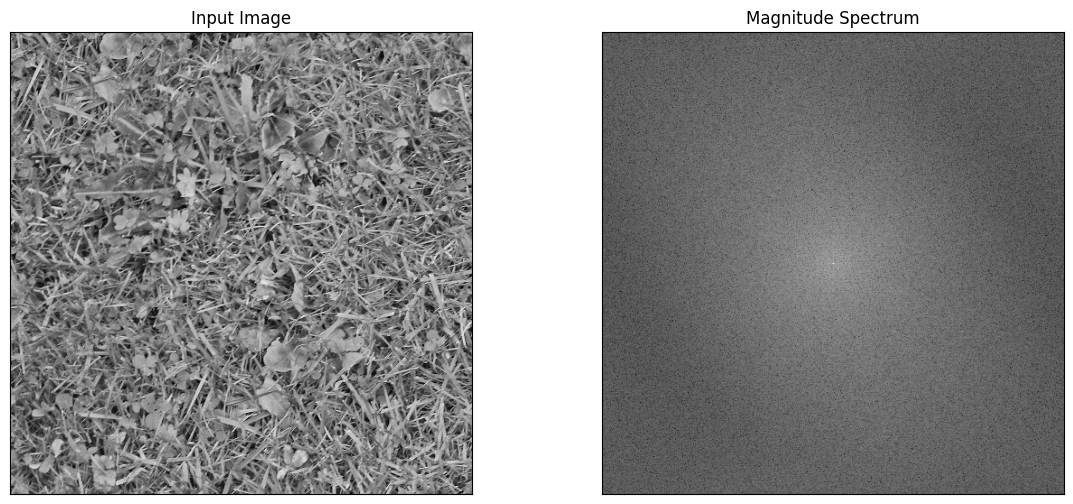

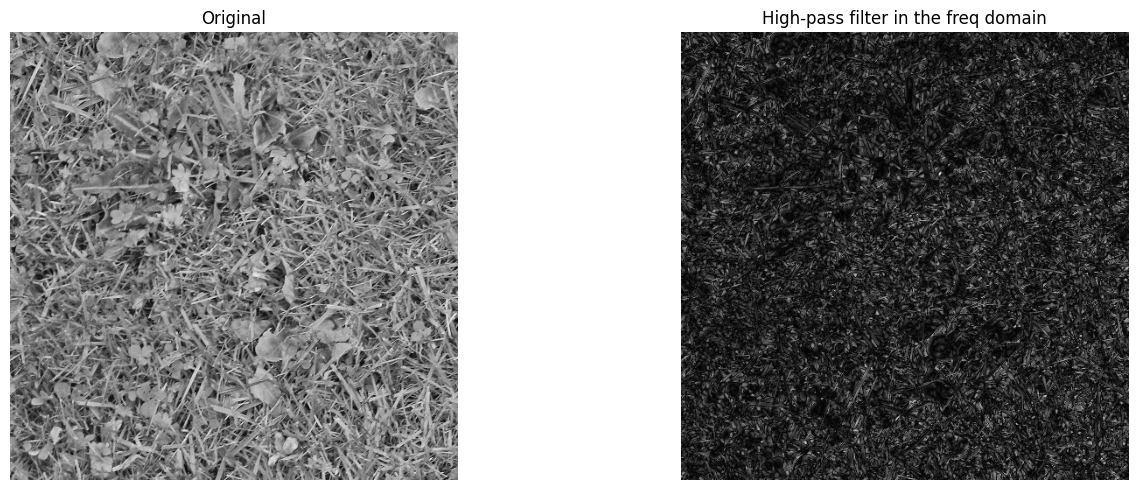

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

# Load the 'grass' image
grass = data.grass()

f = np.fft.fft2(grass) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(grass, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Apply high-pass filter

rows, cols = grass.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Plot original and high pass
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(grass, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(img_back, cmap='gray')
axes[1].set_title("High-pass filter in the freq domain")
axes[1].axis('off')

plt.tight_layout()
plt.show()


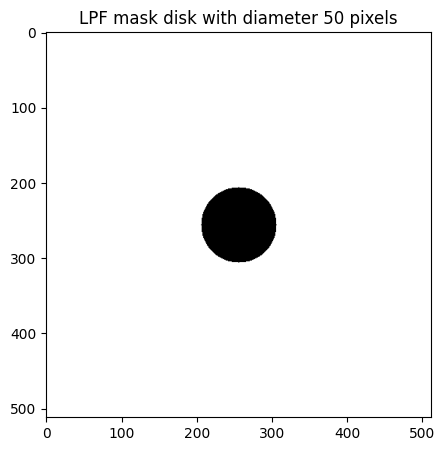

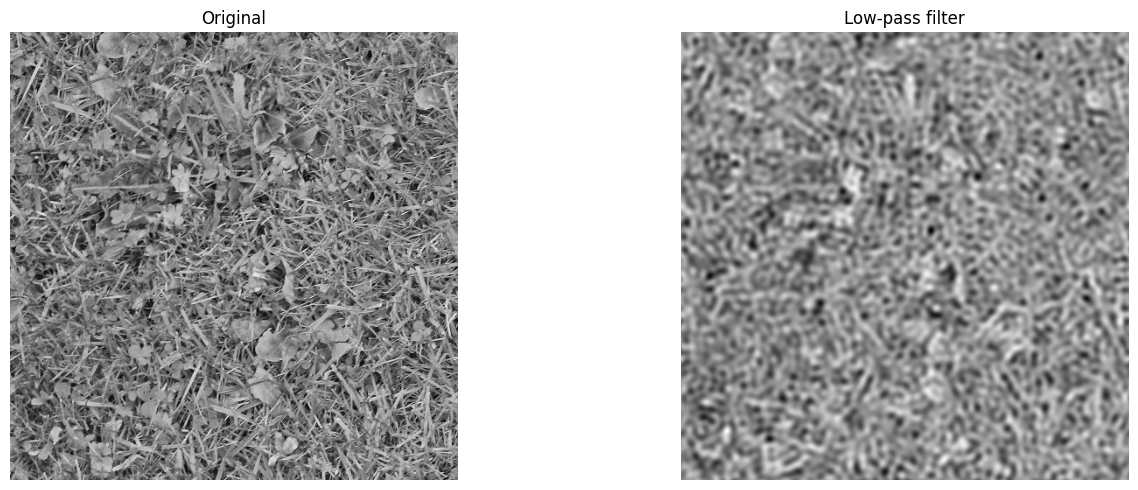

In [ ]:
# Apply low-pass filter

nrows, ncols = grass.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(grass)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

# Plot original and low pass
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(grass, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(img_back, cmap='gray')
axes[1].set_title("Low-pass filter")
axes[1].axis('off')

plt.tight_layout()
plt.show()

 Task 7: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk

<ipython-input-4-7cf3361d8f4f>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(blobs) # visualize image using imshow function
<ipython-input-4-7cf3361d8f4f>:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


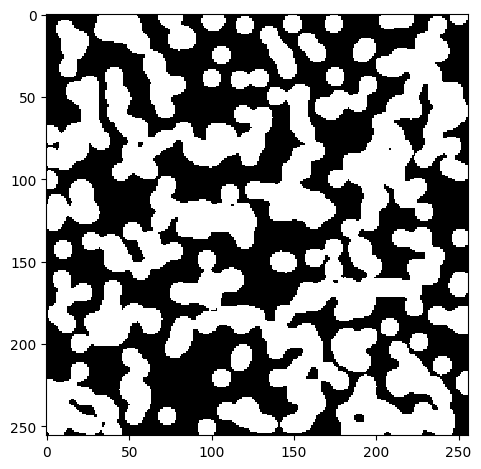

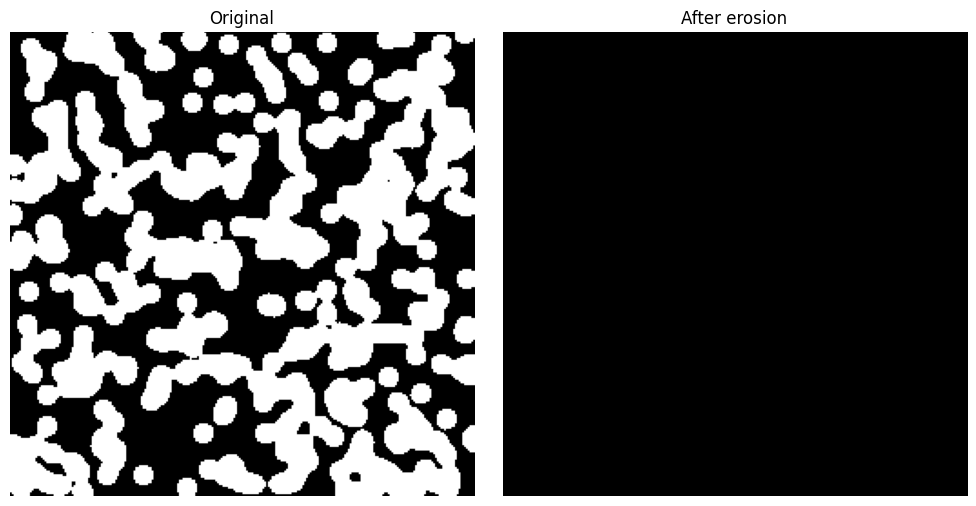

Number of erosions needed to remove all blobs: 5


In [ ]:
from skimage import data
import numpy as np
from skimage import data, io, morphology
import matplotlib.pyplot as plt

data.binary_blobs(length=5, blob_size_fraction=0.2)
np.array([[ True, False,  True,  True,  True],
       [ True,  True,  True, False,  True],
       [False,  True, False,  True,  True],
       [ True, False, False,  True,  True],
       [ True, False, False, False,  True]])
blobs = data.binary_blobs(length=256, blob_size_fraction=0.05)

io.imshow(blobs) # visualize image using imshow function
io.show()

selem = morphology.disk(3)
eroded = blobs.copy()
count = 0

while np.any(eroded):
  eroded = morphology.erosion(eroded,selem)
  count += 1

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(blobs, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(eroded, cmap='gray')
axes[1].set_title('After erosion')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Number of erosions needed to remove all blobs: {count}")